In [7]:
# Importation des packages 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plot
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
SGDClassifier=SGDClassifier()
LinearSVC=LinearSVC()
KNeighborsClassifier=KNeighborsClassifier(n_neighbors=6)
Perceptron=Perceptron()
GaussianNB=GaussianNB()
RandomForestClassifier=RandomForestClassifier(n_estimators=100)
LogisticRegression=LogisticRegression()
DecisionTreeClassifier=DecisionTreeClassifier()
algo_ml={"KNeighborsClassifier":KNeighborsClassifier,
"LinearSVC":LinearSVC,
"Perceptron":Perceptron,
"GaussianNB":GaussianNB,
"RandomForestClassifier":RandomForestClassifier,
"LogisticRegression":LogisticRegression,
"DecisionTreeClassifier":DecisionTreeClassifier}
 #Lecture du dataset
#Lecture du dataset 
data=pd.read_csv(r"C:\Users\HP\Downloads\card\creditcard.csv")

In [46]:
def learning(model):
    model.fit(x_train,y_train)
    ypredict=model.predict(x_test)
    print([confusion_matrix(y_test,ypredict)])
    print(" report:",classification_report(y_test,ypredict))
    n,train_score,val_score=learning_curve(model,x_train,y_train,cv=5,scoring="f1",train_sizes=np.linspace(0.1,1,10))
   
    return n,train_score,val_score
def validation_croisee(n,train_score):
    plot.plot(n,train_score.mean(axis=1))
    plot.plot(n,val_score.mean(axis=1))

In [9]:
#La malédiction de la dimension
data=data.drop(["V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20"],axis=1)

In [27]:
### Etat des valeurs manquantes dans notre dataset

In [10]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [93]:
data.dtypes.value_counts()

float64    14
int64       1
dtype: int64

In [37]:
#Nous avons 30 float et 1 int
#Nous n'avons pas besoin de faire de l'encodage car nous n'avons de variables de type catégorielles



In [94]:
### Statistiques generales du dataset
data.describe()


,Time,V1,V2,V3,V4,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [41]:
## Calculons la variance au niveau de nos variables
# En data science la variance est une erreur qui est due aux fluctuations , en mathématique pn parle d'ecart quadratique ,cela permet de 
#savoir ou nos données se situent par rapport à la moyenne qui est le centre barycentrique de nos donnees 


In [95]:
# Calcul de l'ecart quadratique
variance=data.var()
variance

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64

In [45]:
# les features qui présentent les plus grandes variances sont:
#V12       9.984034e-01
#V13       9.905708e-01
#V14       9.189055e-01
#V15       8.378034e-01
#V16       7.678191e-01#V17       7.213734e-01
#V18       7.025394e-01
#V19       6.626619e-01
#V20       5.943254e-01
#V21       5.395255e-01
#V22       5.266428e-01
#V23       3.899507e-01
#V24       3.668084e-01
#V25       2.717308e-01
#V26       2.325429e-01
#V27       1.629192e-01
#V28       1.089550e-01
#Amount    6.256007e+04
#Class     1.724507e-03

In [96]:
#Qiuantification et  visualisation des valeurs manquantes
data.isna().mean()

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

<AxesSubplot:>

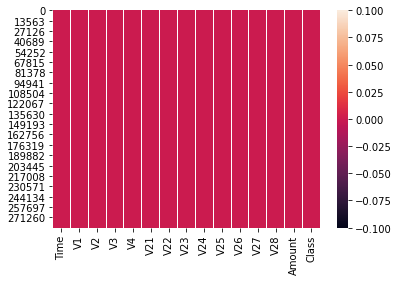

In [97]:
# Notre dataset est un dataset ideal,il ne presente pas de valeurs manquantes.Nous n'avons donc pas besoin de nettoyer
sb.heatmap(data.isna())

In [14]:
data

,Time,V1,V2,V3,V4,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<AxesSubplot:xlabel='Class', ylabel='Amount'>

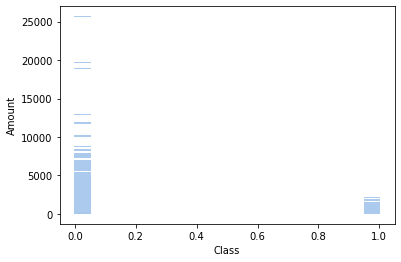

In [16]:
##### Visualisation des variables 
# Nous avons des variables continues donc nous doit utuliser des nuages de points ou des histogrammes
 
sb.histplot(x=data["Class"],y=data["Amount"])
  

In [ ]:
 sb.crosstab(x=data["Class"],y=data["Class"],data=data)

In [ ]:
print("boxplot des variables continues")
for i in data.columns:
  
    plot.figure()
    sb.countplot(x=data[i],data=data,hue="Class")

<AxesSubplot:>

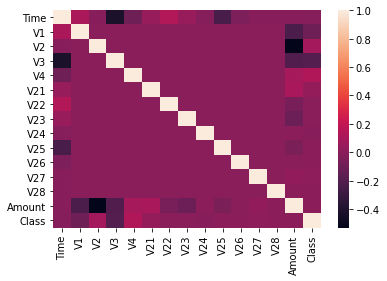

In [98]:
### visualisation de ma matrice de correlation
sb.heatmap(data.corr())
#Conclusions:les variables correléees sont :class  v12 V4 V2

In [22]:
#Conclusions:les variables correléees sont :class  v12 V4 V2
 
test,train,=train_test_split(data,test_size=0.3) 


In [ ]:
# visualisation intervariable
print("cross","table")
for i in data.columns:
    plot.figure()
    pd.crosstab(data["Class"],data[i])

In [23]:
x_test=test.drop("Class",axis=1)
y_test=test["Class"]

In [24]:
x_train=test.drop("Class",axis=1)
y_train=test["Class"]

In [27]:
for i in algo_ml.values():
    print(i)
    
    i.fit(x_train,y_train)
    print("Score:",i,":",i.score(x_train,y_train))

KNeighborsClassifier(n_neighbors=6)
Score: KNeighborsClassifier(n_neighbors=6) : 0.9984099436207139
LinearSVC()


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Score: LinearSVC() : 0.9983597841134809
Perceptron()
Score: Perceptron() : 0.9983347043598644
GaussianNB()
Score: GaussianNB() : 0.9907355390140647
RandomForestClassifier()
Score: RandomForestClassifier() : 0.9999949840492767
LogisticRegression()


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score: LogisticRegression() : 0.9983748319656508
DecisionTreeClassifier()
Score: DecisionTreeClassifier() : 1.0


In [29]:
ypredict=DecisionTreeClassifier.predict(x_test) 
#data

In [30]:
ver=pd.DataFrame({"y":test["Class"],"ypredict":ypredict})


,y,ypredict
149800,0,0
217172,0,0
38178,0,0
152699,0,0
78967,0,0
...,...,...
233855,0,0
157211,0,0
200862,0,0
262665,0,0


In [42]:

n,train_score,val_score=learning(list(algo_ml.values())[6])
 

[array([[199038,      0],
       [     0,    326]], dtype=int64)]
 report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199038
           1       1.00      1.00      1.00       326

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [ ]:
# Notre matrice de confusion nous indique 100% de vrais positifs, 100% de vrais négatifs, 
## Les métriques nous idntiques clairement que notre model arrive à faire 100% de prédictions

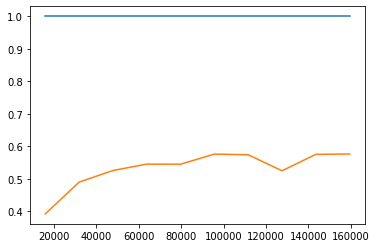

In [47]:
#Bien que satisfaisante ces metriques ne nous disent pas totalement si notre modele est totalement près à généraliser
#Pour cela nous allons splité notre jeu de donnéée pour valider l'entrainement :on parle de validation croisé 

validation_croisee(n,train_score)   

In [ ]:
#La validation croisée nous a permis de nous rendre compte que notre modele est en overfiting ou surapprentissage,
#Il n'arrive pas à généraliser
#La démarche d'un data scientist veut que l'on refasse le mmeme processus avec plusieurs modeles pour voir celui,
#Qui généralise le mieux et donc le choisir pour en production